In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [114]:
df = pd.read_csv('insurance.csv')

In [115]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [116]:
df.shape

(1338, 7)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [118]:
# therefore we have to do the feature encoding 
# as sex , smoker , region we have to encode 

In [119]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [120]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [121]:
#under stant the distribution of age 

/var/folders/bh/mfvp5hz91xxfh95rz992d7sh0000gn/T/ipykernel_16998/1696170631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


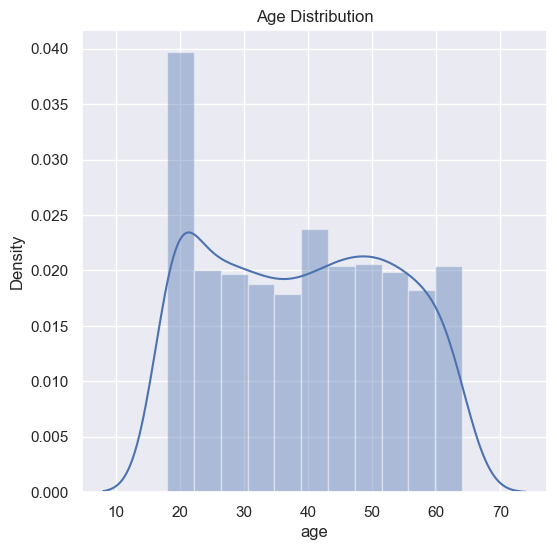

In [122]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()


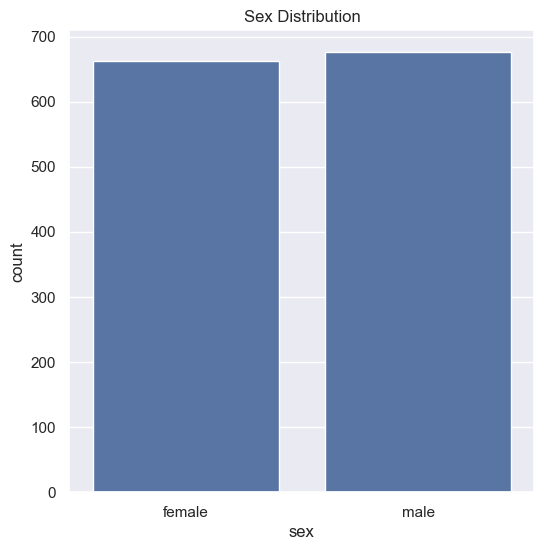

In [123]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
plt.show()

In [124]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/var/folders/bh/mfvp5hz91xxfh95rz992d7sh0000gn/T/ipykernel_16998/3206149479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


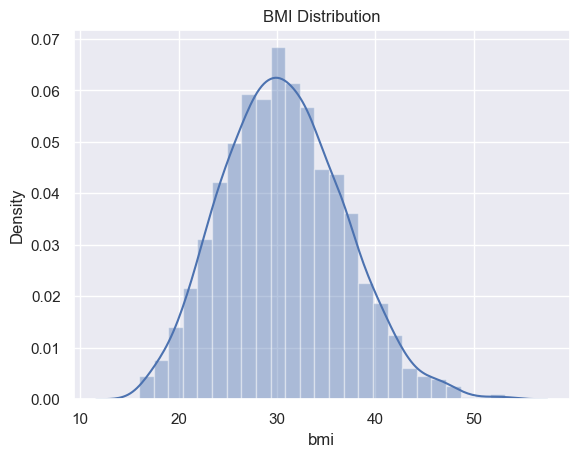

In [125]:
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

In [126]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [127]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [128]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [129]:
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [130]:
x = df.drop(columns="charges",axis=1)
y = df['charges']

In [131]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [132]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [133]:
x_train , x_test ,  y_train , y_test = train_test_split(x,y,test_size=0.2)


In [134]:
reg = LinearRegression()

In [135]:
reg.fit(x_train,y_train)

LinearRegression()

In [136]:
train_d_pred = reg.predict(x_train)

In [137]:
r2_train = metrics.r2_score(y_train , train_d_pred)

In [138]:
r2_train

0.7506275114721609

In [139]:
test_d_pred = reg.predict(x_test)

In [140]:
metrics.r2_score(y_test , test_d_pred)

0.7508205360253201

In [141]:
sample_input_data=(30,1,22.7,0,1,0)

In [142]:
input_data_as_numpy_array = np.asarray(sample_input_data)

In [143]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [144]:
prediction = reg.predict(input_data_reshaped)

/Users/pruthveshbaitule25/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [145]:
print("The insurance cost is",prediction)

The insurance cost is [2302.78175505]
